In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#load the data
#load data
df = pd.read_csv("BTC-USD.csv")
#Set data as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,3.770731e+10
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2021-12-08,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2021-12-09,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10


In [3]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,3.770731e+10
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2021-12-08,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2021-12-09,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10


In [4]:
future_days = 5

In [5]:
#Create new column containing future price
df[str(future_days)+'_Day_price_Forecast'] = df[['Close']].shift(-future_days)
#Show data
df[['Close', str(future_days)+'_Day_price_Forecast']]

<ipython-input-5-f814190ba5c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(future_days)+'_Day_price_Forecast'] = df[['Close']].shift(-future_days)


,Close,5_Day_price_Forecast
2014-09-17,457.334015,402.152008
2014-09-18,424.440002,435.790985
2014-09-19,394.795990,423.204987
2014-09-20,408.903992,411.574005
2014-09-21,398.821014,404.424988
...,...,...
2021-12-06,50582.625000,NaN
2021-12-07,50700.085938,NaN
2021-12-08,50504.796875,NaN
2021-12-09,47672.121094,NaN


In [6]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [53598.246094]
 [49200.703125]
 [49368.847656]]


In [7]:
y = np.array(df[str(future_days)+'_Day_price_Forecast'])
y = y[:-future_days]
print(y)

[  402.152008   435.790985   423.204987 ... 50504.796875 47672.121094
 48460.320313]


In [8]:
#Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=True)

In [9]:
from sklearn.svm import SVR 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [10]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.5932579678549463


In [11]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[25324.44705992  8326.23600991   510.02780481   382.19882505
   788.1188016   8407.91298838 24024.76601242  3952.20601879
   246.16703624   284.45942544 19095.16237035  7523.15103859
 11579.08264689   240.48338425  8691.33343557  3575.6656218
  9464.56324145   370.87094707 10232.2688973   9769.47168667
  6852.53867453  6950.87803625   439.16282131  1107.49690788
 26507.99466351 10840.3155798  11533.80457242  1237.47500444
  1098.47346092   380.9569102  16050.45963409  3710.5927744
  6054.02458376  9887.21239885   251.1190814  20884.35090756
  6532.40066559  4091.31357015  8238.53577249 10042.90056533
  3694.58711824 10275.58970731   623.17073504   948.93842093
 10222.7573517  22806.2203695   6472.73832366   682.7851755
  6606.2011454    435.84592014  6852.21510989 23241.62406755
  8332.57951297 28061.00700555  8267.34569727   714.75822738
  6717.24316595 10350.29475247 13632.94926464  4010.49963026
  6462.01497845  9265.03042047  2708.10120447 22492.42948955
 10918.94275872   414.35707

In [12]:
print(y_test)

[51753.410156  8598.30957    569.19397    407.230011   831.533997
  9377.013672 36069.804688  4338.709961   240.296005   281.082001
 19497.400391  8424.269531 11488.363281   238.735001  9328.197266
  3630.699951  9344.365234   376.446991 10530.732422  9529.803711
  6495.        6238.049805   458.048004  1047.150024 38903.441406
 11094.34668   9395.009766  1193.910034  1063.069946   336.187012
 16564.        3464.013428  6011.450195 10346.760742   238.871994
 46365.402344  6602.950195  4382.879883  8673.21582   9519.145508
  3576.032471  9510.200195   638.645996   989.02301  11916.700195
 46481.105469  6453.720215   654.096985  7370.779785   448.428009
  6162.47998  62210.171875  9818.349609 49327.722656  9358.589844
   737.226013  7994.416016  9607.423828 15599.200195  3985.080811
  6867.527344  9525.363281  1929.819946 57523.421875  9578.629883
   383.61499    430.010986   596.297974 44695.359375 63503.457031
 10106.299805  5795.708496 57274.679688  4200.669922  7927.714355
  2564.060

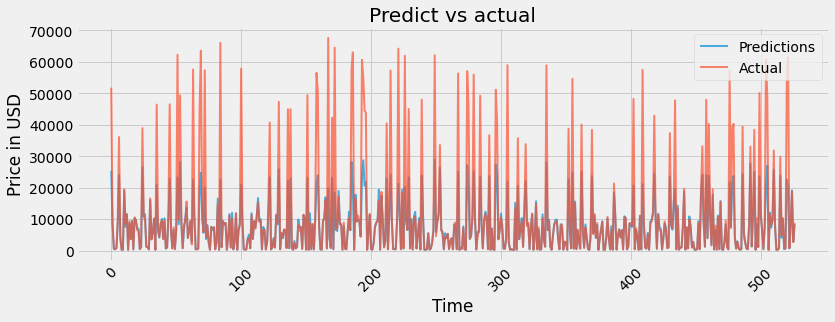

In [13]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Predictions', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Predict vs actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()